# [CSE426] Image Processing
Teaching Assistant: Hyunmin Ban (hmban1996@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P2: Intensity Transformation

## P2.A: Gamma Transformation (4점)

### 실습내용
실습은 다음 순서로 진행됩니다.
- 0) 실습에서 사용되는 패키지 import
- 1) 주어진 이미지 loading
- 2) 함수 정의 **(code 구현)**
- 3) Matplotlib로 이미지 확인

### 점수
- 2) 함수 구현 4점

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export (Download) as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.
- e-campus에 .ipynb 파일과 .html 파일을 zip파일로 하지 말고 따로따로 올리세요.

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

## 1) Load Image

In [2]:
img = cv2.imread('aerial.jpg', cv2.IMREAD_GRAYSCALE) # 이미지 파일 읽기

cv2.imshow('image', img)      
cv2.waitKey(0)                
cv2.destroyAllWindows()       

## 2) Define Function

**요구사항**
- power-law transform을 직접 구현하세요 

In [3]:
def power_law(gamma, r):
    result = r.copy()
    result = ((r / 255) ** (1/gamma)) * 255 
    result = result.astype('uint8') #정수형으로 바꿔준다.
    return result

## 3) Plot Image

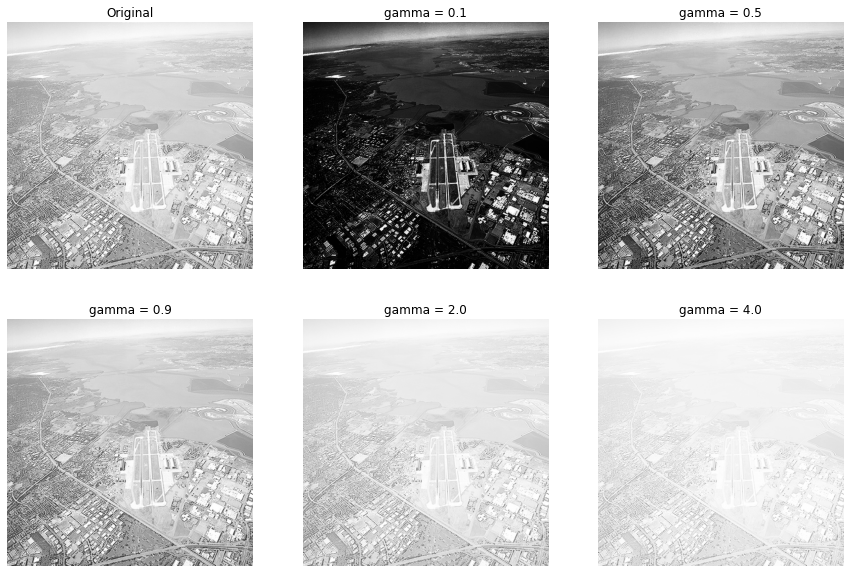

In [4]:
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
  
ax1 = fig.add_subplot(rows, cols, 1)
image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # matplot 라이브러리의 imshow함수를 사용하여 영상을 보일경우, RGB 포맷으로 변환해주어야 함
ax1.imshow(image)
ax1.set_title('Original')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
gamma0 = cv2.cvtColor(power_law(0.1, img), cv2.COLOR_GRAY2RGB)
ax2.imshow(gamma0)
ax2.set_title('gamma = 0.1')
ax2.axis("off")
 
ax3 = fig.add_subplot(rows, cols, 3)
gamma1 = cv2.cvtColor(power_law(0.5, img), cv2.COLOR_GRAY2RGB)
ax3.imshow(gamma1)
ax3.set_title('gamma = 0.5')
ax3.axis("off")
 
ax4 = fig.add_subplot(rows, cols, 4)
gamma2 = cv2.cvtColor(power_law(0.9, img), cv2.COLOR_GRAY2RGB)
ax4.imshow(gamma2)
ax4.set_title('gamma = 0.9')
ax4.axis("off")

ax5 = fig.add_subplot(rows, cols, 5)
gamma3 = cv2.cvtColor(power_law(2.0, img), cv2.COLOR_GRAY2RGB)
ax5.imshow(gamma3)
ax5.set_title('gamma = 2.0')
ax5.axis("off")
 
ax6 = fig.add_subplot(rows, cols, 6)
gamma4 = cv2.cvtColor(power_law(4.0, img), cv2.COLOR_GRAY2RGB)
ax6.imshow(gamma4)
ax6.set_title('gamma = 4.0')
ax6.axis("off")

plt.show()

---

## P2.B: Histogram Processing (6점)

### 실습내용
실습은 다음 순서로 진행됩니다.
- 1) 이미지 loading
- 2) 함수 정의 **(code 구현)**
- 3) Matplotlib로 이미지 확인
- 4) Discussion

### 점수
- 2) 함수 구현 6점
- Discussion 작성에 불성실하면 감점 

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export (Download) as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## 1) Load Image

In [5]:
img = cv2.imread('pollen.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2) Define Function

**요구사항**
- 1) Histogram Stretching을 직접 구현하세요
- 2) Histogram Equalization을 opencv의 equalizeHist를 사용하지 마시고 직접 구현하세요
- 3) Histogram 함수는 numpy 혹은 opencv 함수를 사용하면 됩니다.

In [6]:
def Hist_Stretch(img):
    result = img.copy()
    height, width = img.shape
    mini = img.min()
    maxi = img.max()
    for i in range(width):
        for j in range(height):
            result[i][j] = ((img[i][j] - mini)/(maxi - mini) * 255)
    return result

my_HS = Hist_Stretch(img)

In [7]:
def Hist_Equalization(img):
    hist, bins = np.histogram(img.ravel(), 256, [0,256])
    cdf = hist.cumsum() # 누적합 구하기 
    mini = 256
    for i in range(256):
        if cdf[i] == 0:
            continue;
        else:
            if cdf[i] < mini:
                mini = cdf[i]
    maxi = cdf.max()

    cdf_ = ((cdf - mini) / (maxi - mini) * 255)
    cdf_ = cdf_.astype('uint8')

    result = cdf_[img]  
    return result

my_HE = Hist_Equalization(img)

In [8]:
# opencv로 Histogram Equalization을 한 것으로 직접 구현한 함수와 비교하기 위해 사용
cv2_HE = cv2.equalizeHist(cv2.imread('pollen.jpg', cv2.IMREAD_GRAYSCALE))

## 3) Plot Image

Text(0.5, 1.0, 'Histogram (After HE-OpenCV)')

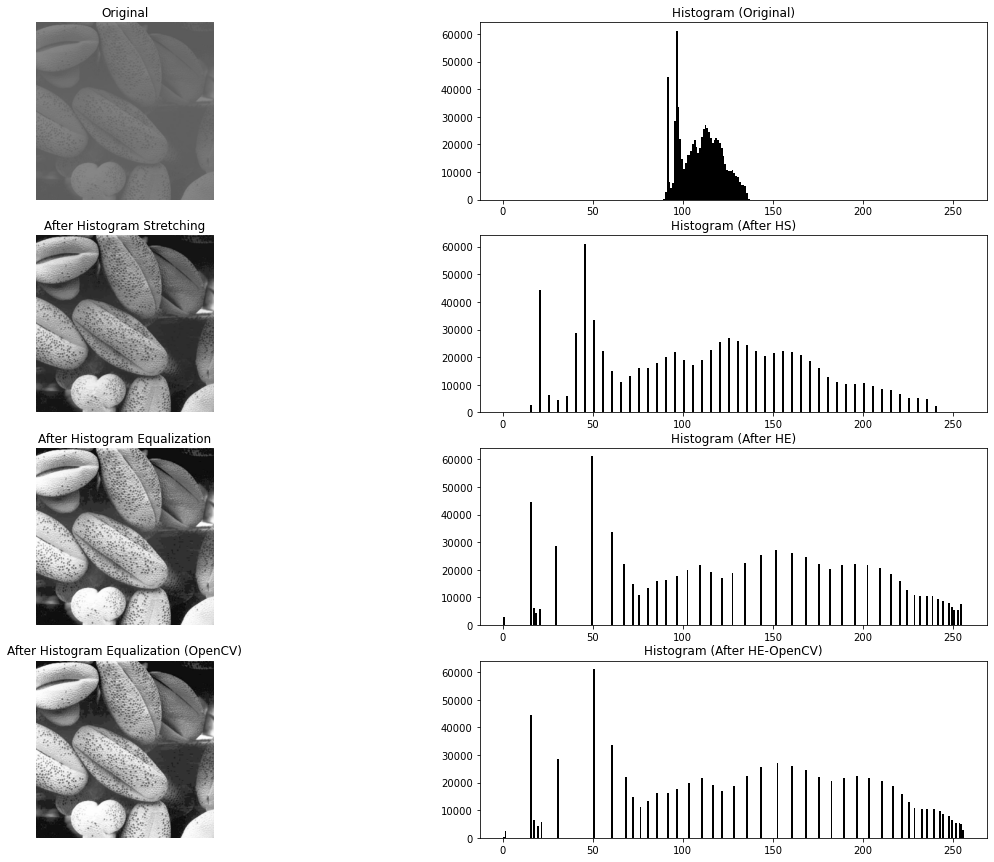

In [9]:
fig = plt.figure(figsize = (20, 15)) # rows*cols 행렬의 i번째 subplot 생성
rows = 4
cols = 2
  
ax1 = fig.add_subplot(rows, cols, 1)
image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # matplot 라이브러리의 imshow함수를 사용하여 영상을 보일경우, RGB 포맷으로 변환해주어야 함
ax1.imshow(image)
ax1.set_title('Original')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.hist(img.flatten(),256,[0,256], color = 'black')
ax2.set_title('Histogram (Original)')

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(cv2.cvtColor(my_HS, cv2.COLOR_GRAY2RGB))
ax3.set_title('After Histogram Stretching')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
ax4.hist(my_HS.flatten(),256,[0,256], color = 'black')
ax4.set_title('Histogram (After HS)')

ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(cv2.cvtColor(my_HE, cv2.COLOR_GRAY2RGB))
ax5.set_title('After Histogram Equalization')
ax5.axis("off")
 
ax6 = fig.add_subplot(rows, cols, 6)
ax6.hist(my_HE.flatten(),256,[0,256], color = 'black')
ax6.set_title('Histogram (After HE)')

ax7 = fig.add_subplot(rows, cols, 7)
ax7.imshow(cv2.cvtColor(cv2_HE, cv2.COLOR_GRAY2RGB), cmap='gray')
ax7.set_title('After Histogram Equalization (OpenCV)')
ax7.axis("off")
 
ax8 = fig.add_subplot(rows, cols, 8)
ax8.hist(cv2_HE.flatten(),256,[0,256], color = 'black')
ax8.set_title('Histogram (After HE-OpenCV)')

## 4) Discussion

**1) Histogram Equalization에 대해 설명하세요.**

[답변작성]

Histogram Equalization은 어떤 이미지의 히스토그램이 특정한 부분에 몰려 있는 경우 전체 픽셀에 고르게 퍼질 수 있도록 평평하게 만들어 주는 것입니다. Histogram Equalization을 하고 나면 한쪽 부분에 몰려 있던 밝기가 다시 분배되므로 명암 대비가 개선되는 것을 볼 수 있습니다.  

**2) Histogram Matching에 대해 설명하세요.**

[답변작성]

Histogram Equalization은 전체 픽셀에 고르게 퍼지도록 한다면 Histogram Matching은 사용자가 원하는 히스토그램으로 변환하는 것 입니다. Histogram Matching이 이루어지는 과정은 원래의 이미지를 equalize하고, 우리가 원하는 히스토그램 모양인 히스토그램을 equalize합니다. 그 후 반대로 역 equalize를 해서 원래의 이미지에 매칭시키면 됩니다.

**3) 주어진 pollen.jpg 이외의 다른 사진(각자 원하는 사진)을 Histogram Equalization에 사용해보세요.**

[답변작성]

Text(0.5, 1.0, 'Histogram (After HE-OpenCV)')

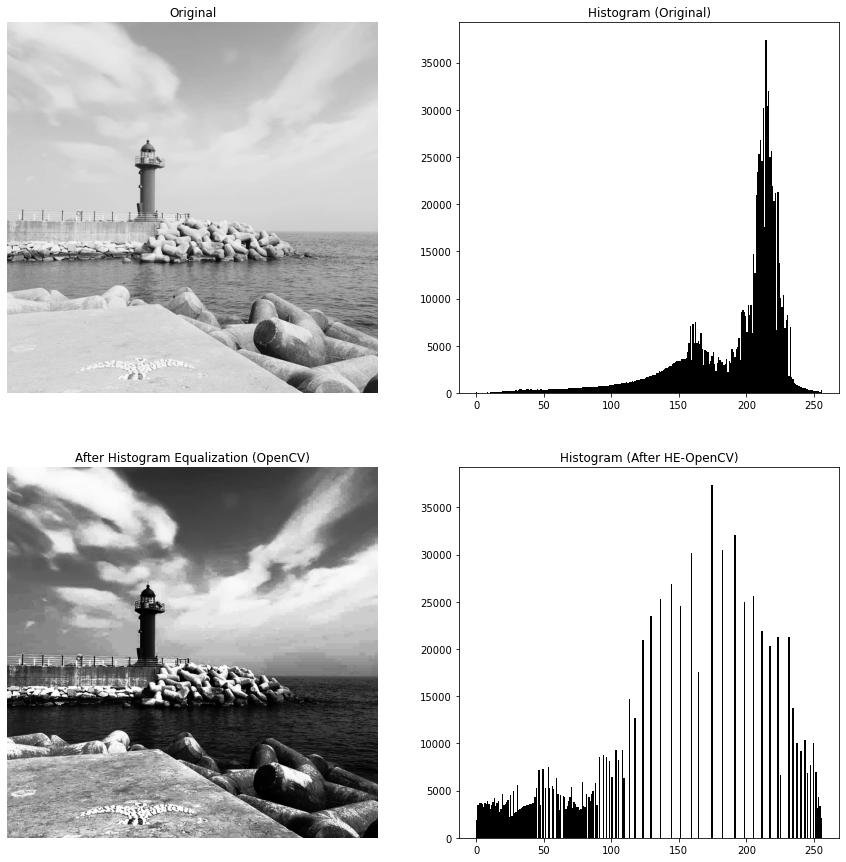

In [10]:
im = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
he = cv2.equalizeHist(cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE))

fig = plt.figure(figsize = (15, 15))

ax1 = fig.add_subplot(2, 2, 1)
image = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) 
ax1.imshow(image)
ax1.set_title('Original')
ax1.axis("off")
 
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(im.flatten(),256,[0,256], color = 'black')
ax2.set_title('Histogram (Original)')

ax9 = fig.add_subplot(2, 2, 3)
ax9.imshow(cv2.cvtColor(he, cv2.COLOR_GRAY2RGB), cmap='gray')
ax9.set_title('After Histogram Equalization (OpenCV)')
ax9.axis("off")
 
ax0 = fig.add_subplot(2, 2, 4)
ax0.hist(he.flatten(),256,[0,256], color = 'black')
ax0.set_title('Histogram (After HE-OpenCV)')

---